# Recognition of Ukrainian Characters

In [1]:
%matplotlib inline

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import tensorflow as tf

In [2]:
# alphabet = list('АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯабвгґдеєжзиіїйклмнопрстуфхцчшщьюя')
# np.array(alphabet)

# classes = len(alphabet)

alphabet = list('0123456789')
np.array(alphabet)

classes = len(alphabet)

## Loading the Dataset

In [4]:
with open('uaset-0p.csv') as csvfile:
    rdr = csv.reader(csvfile)
    
    # Skip the headers
    next(rdr, None)
    
    to_int = np.vectorize(int)
    
    imgs = [to_int(row) for row in rdr]

First number of each row is a label

In [5]:
if len(imgs[0]) == 785: # Second run would break the data
    labels = []

    for row in imgs:
        labels.append(row[0])

    labels = np.array(labels)

The following 784 numbers are the values from range 0-255, specifying the colors of the corresponding pixels of an 8-bit grayscale 28x28 image.

In [6]:
if len(imgs[0]) == 785: # Second run would break the data
    imgs = [im[1:] for im in imgs]

In [7]:
def dense_to_one_hot(label, lo, hi):
    return [int(label == k) for k in range(lo, hi)]

def one_hot_to_dense(label):
    return label.index(1)

In [8]:
# Second run would cause an error
labels = [dense_to_one_hot(lbl, 0, 66) for lbl in labels]
print(labels[:2])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [9]:
data = pd.DataFrame()
data['labels'] = labels
data['images'] = imgs

In [10]:
size = len(data)
test_size = 10000
validation_size = 5000
# test_size = 966
# validation_size = 0
train_size = size - test_size - validation_size

val_beg, val_end = test_size, test_size + validation_size
train_beg, train_end = val_end, val_end + train_size

test =       lambda df: df.iloc[0:test_size]
validation = lambda df: df.iloc[val_beg:val_end]
train =      lambda df: df.iloc[train_beg:train_end]

IndexError: list index out of range

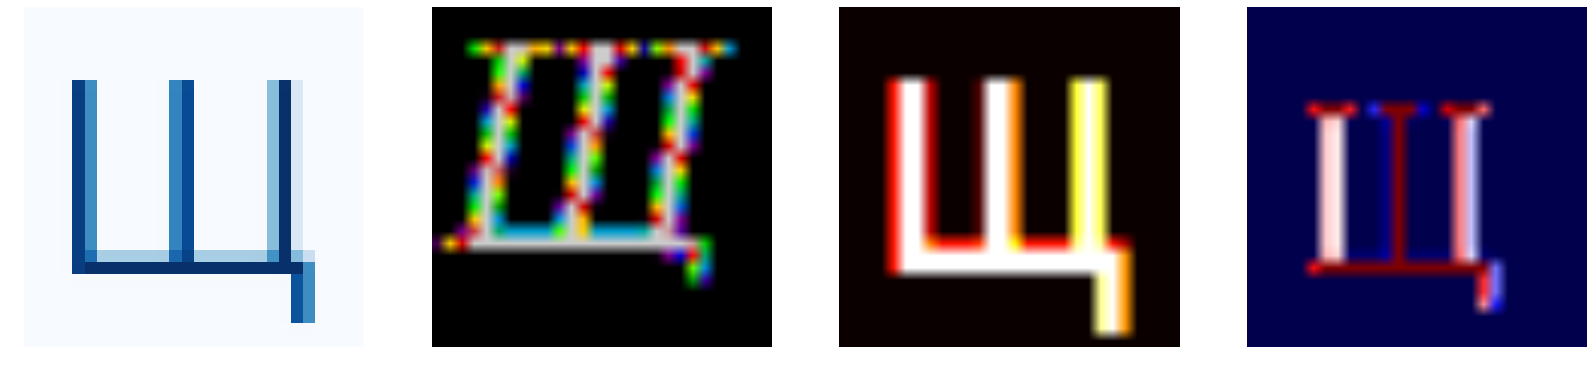

In [11]:
i = np.random.randint(len(data))
label = one_hot_to_dense(data['labels'][i])

imgs = [data['images'][i].reshape([28,28])]

for _ in range(3):
    while True:
        i = np.random.randint(len(data))
        if one_hot_to_dense(data['labels'][i]) == label:
            break
            
    imgs.append(data['images'][i].reshape([28,28]))

pylab.rcParams['figure.figsize'] = 28, 28 
fig1 = plt.figure()

ax1 = fig1.add_subplot(1,4,1) 
ax1.set_axis_off()
ax1.imshow(imgs[0], cmap='Blues', interpolation='none')

ax2 = fig1.add_subplot(1,4,2) 
ax2.set_axis_off()
ax2.imshow(imgs[1], cmap='spectral')

ax3 = fig1.add_subplot(1,4,3) 
ax3.set_axis_off()
ax3.imshow(imgs[2], cmap='hot')

ax4 = fig1.add_subplot(1,4,4)
ax4.set_axis_off()
ax4.imshow(imgs[3], cmap='seismic')

print("Label:", alphabet[label])

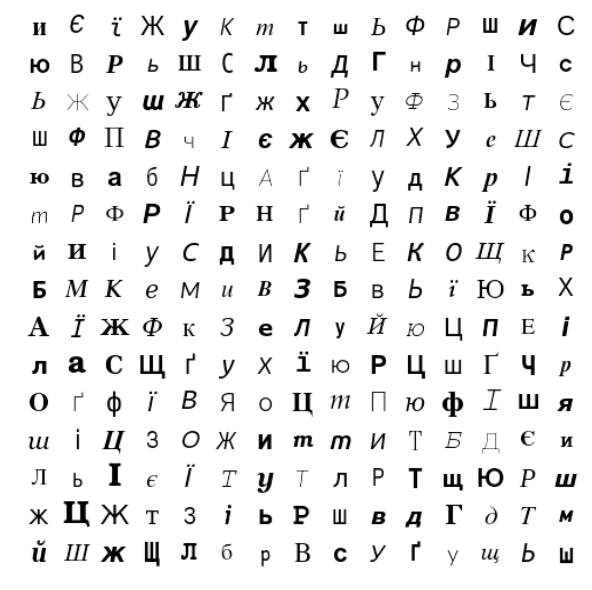

In [12]:
side = 15

pylab.rcParams['figure.figsize'] = 10, 10 
fig1 = plt.figure()

for i in range(side):
    for j in range(side):
        k = np.random.randint(0, len(data))
        
        ax1 = fig1.add_subplot(side,side,i*side + j + 1) 
        ax1.set_axis_off()
        ax1.imshow(data['images'][k].reshape([28, 28]), cmap='Greys')
        
fig1.savefig("test.png", bbox_inches='tight')

## Deep Convolutional Neural Network (TensorFlow)

In [12]:
sess = tf.InteractiveSession()

In [13]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 66])

In [14]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [15]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [16]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [17]:
x_image = tf.reshape(x, [-1,28,28,1])

In [18]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [19]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [20]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [21]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [22]:
W_fc2 = weight_variable([1024, 66])
b_fc2 = bias_variable([66])

In [23]:
y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [ ]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.initialize_all_variables())

accuracy_log = []

for i in range(20000):
    batch = train(data).sample(50)

    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch['images'].tolist(), y_: batch['labels'].tolist(), keep_prob: 1.0})
        
        print("step %d, training accuracy %g"%(i, train_accuracy))
        accuracy_log.append(train_accuracy)
    
    train_step.run(feed_dict={x: batch['images'].tolist(), y_: batch['labels'].tolist(), keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: test(data)['images'].tolist(), y_: test(data)['labels'].tolist(), keep_prob: 1.0}))

step 0, training accuracy 0
step 100, training accuracy 0.14
step 200, training accuracy 0.08
step 300, training accuracy 0.06
step 400, training accuracy 0.08
step 500, training accuracy 0.1
step 600, training accuracy 0.08
step 700, training accuracy 0.1
step 800, training accuracy 0.1
step 900, training accuracy 0.08
step 1000, training accuracy 0.04
step 1100, training accuracy 0.1
step 1200, training accuracy 0.02
step 1300, training accuracy 0.02
step 1400, training accuracy 0.04
step 1500, training accuracy 0.16
step 1600, training accuracy 0.18
step 1700, training accuracy 0.08
step 1800, training accuracy 0.06
step 1900, training accuracy 0.1
step 2000, training accuracy 0.02
step 2100, training accuracy 0.1
step 2200, training accuracy 0.06
step 2300, training accuracy 0.1
step 2400, training accuracy 0.04
step 2500, training accuracy 0.04
step 2600, training accuracy 0.1
step 2700, training accuracy 0.04
step 2800, training accuracy 0.12
step 2900, training accuracy 0.06
ste

In [51]:
imgs.shape

(69762, 784)

С


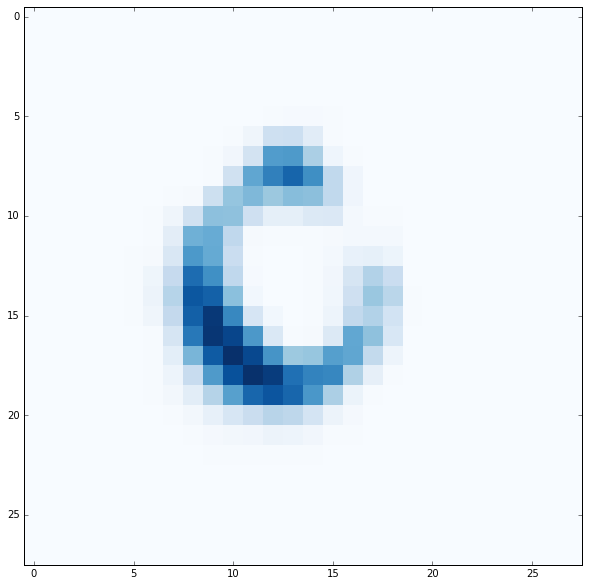

In [111]:
batch = train(data).sample(50)

imgs = batch['images'].tolist()
labels = batch['labels'].tolist()

i = np.random.randint(0, 50)

plt.imshow(imgs[i].reshape([28,28]), cmap='Blues', interpolation='none')
print(alphabet[one_hot_to_dense(labels[i])])

In [1]:
plt.plot([t for t in range(len(accuracy_log))], accuracy_log)

NameError: name 'plt' is not defined

9966